Hola **Rafael**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Veo que no hay comentarios de la iteración anterior, sin ellos no se puede dar un correcto seguimiento al proceso de tu proyecto. La intervención será breve, donde se requiera ya que sin los comentarios anteriores no puedo saber donde se realizaron los cambios.
</div>

# Condiciones de la asignación principal

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

### Objetivo
 Predecir la cancelación de clientes en Interconnect para aplicar estrategias de retención efectivas.

### Etapas del Proyecto

#### 1. Descripción de los datos
 - Cargar y explorar los archivos: `contract.csv`, `personal.csv`, `internet.csv` y `phone.csv`.
 - Analizar la estructura del dataset (tipos de datos, valores faltantes, duplicados, etc.).

#### 2. Preprocesamiento de datos
 - Manejar valores nulos y duplicados.
 - Convertir variables a formatos adecuados.
 - Crear nuevas variables relevantes.

#### 3. Análisis exploratorio de datos (EDA)
 - Evaluar la distribución de la variable objetivo (cancelación de clientes).
 - Identificar patrones en la cancelación según tipo de contrato, servicios contratados, métodos de pago, etc.
 - Visualizar tendencias con gráficos.

#### 4. Modelado y predicción
 - Seleccionar y entrenar modelos de Machine Learning.
 - Evaluar el rendimiento con métricas como precisión, recall y AUC-ROC.

#### 5. Evaluación y recomendaciones
 - Identificar factores clave en la cancelación.
 - Proponer estrategias de retención basadas en los resultados del modelo.



# Paso 1. Descripción de los datos

Lee los archivos de datos (`final_provider/contract.csv`, `final_provider/internet.csv`, `final_provider/personal.csv`y `final_provider/phone.csv` ) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.

In [293]:
# Manipulación de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesamiento y utilidades
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import lightgbm as lgb

# Métricas de evaluación
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    roc_curve,
    roc_auc_score
)

In [221]:
df_contract = pd.read_csv('final_provider/contract.csv')
print(df_contract.head())
print(df_contract.info())

In [222]:
df_internet = pd.read_csv('final_provider/internet.csv')
print(df_internet.head())
print(df_internet.info())

In [223]:
df_personal = pd.read_csv('final_provider/personal.csv')
print(df_personal.head())
print(df_personal.info())

In [224]:
df_phone = pd.read_csv('final_provider/phone.csv')
print(df_phone.head())
print(df_phone.info())

# Paso 2. Preprocesamiento de datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?.

In [225]:
print(df_contract.duplicated().sum())
print(df_internet.duplicated().sum())
print(df_personal.duplicated().sum())
print(df_phone.duplicated().sum())

In [226]:
print(df_contract.isnull().sum())
print()
print(df_internet.isnull().sum())
print()
print(df_personal.isnull().sum())
print()
print(df_phone.isnull().sum())

In [227]:
print(df_contract.describe())
print()


In [228]:
print(df_internet.describe())
print()


In [229]:
print(df_personal.describe())


In [230]:
print()
print(df_phone.describe())

Se convertira los tipos de datos de fecha asi mismo se creara una nueva columna ternure 

In [231]:
# Convertir las columnas de fecha a formato datetime
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], errors='coerce')

In [232]:
df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

In [233]:
#df_contract['Tenure'] = np.where(
  #  df_contract['EndDate'].notna(),  
   #(df_contract['EndDate'] - df_contract['BeginDate']).dt.days,  
   #np.nan  # Dejar NaN si EndDate es NaN
#)

In [234]:
#df_contract['Tenure'] = df_contract['Tenure'].astype('Int64')

In [235]:
df_maste_raw = df_contract.merge(df_personal, on='customerID', how='left') \
                        .merge(df_internet, on='customerID', how='left') \
                        .merge(df_phone, on='customerID', how='left')

In [236]:
df_maste_raw.head()

In [237]:
df_maste_raw.isnull().sum()

In [238]:
df_maste_raw[df_maste_raw['TotalCharges'].isnull()]

In [239]:
df_maste_raw['TotalCharges'] = df_maste_raw['TotalCharges'].fillna(0) #devido a que 11 clientes no alzazaron a facturar el mes se les pone 0 en 'totalchange'

In [240]:
df_maste_raw['MultipleLines'] = df_maste_raw['MultipleLines'].fillna(0)

In [241]:
df_maste_raw.isnull().sum()

In [242]:
df_maste_raw['Activo'] = df_maste_raw['EndDate'].isna().map({True: 0, False: 1})

In [243]:
# Lista de columnas con nulos que quieres eliminar
columnas_con_nulos = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Elimina las filas que tengan nulos en cualquiera de esas columnas
df_maste_raw = df_maste_raw.dropna(subset=columnas_con_nulos)

In [244]:
df_maste_raw.isnull().sum()

Eliminamos las columnas que no aportarn informacion 

In [245]:
info_noecencial = ['customerID','BeginDate','gender','SeniorCitizen','EndDate']

In [246]:
df_master= df_maste_raw.drop(info_noecencial, axis = 1)

In [247]:
df_master.head()

In [248]:
tipos_de_datos = pd.DataFrame(df_master.dtypes)
print(tipos_de_datos)

In [249]:
variables_categoricas = list(tipos_de_datos[tipos_de_datos[0] == 'object'].index)
print(variables_categoricas)

In [250]:
variables_numericas = list(tipos_de_datos[tipos_de_datos[0] != 'object'].index)
print(variables_numericas)

In [251]:
datos_para_modelo = pd.get_dummies(df_master, drop_first = True,columns = variables_categoricas )

In [252]:
datos_para_modelo.head()

# Paso 3 Análisis exploratorio de datos (EDA)
 - Evaluar la distribución de la variable objetivo (cancelación de clientes).
 - Identificar patrones en la cancelación según tipo de contrato, servicios contratados, métodos de pago, etc.
 - Visualizar tendencias con gráficos.



### Se recuerda que el 0 siignifica que el cliente sigue activo y el 1 significa que se a ido

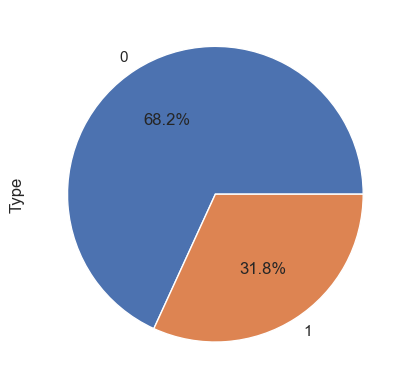

In [253]:
exit_client = (datos_para_modelo[datos_para_modelo['Activo']== 1])
stay_client = (datos_para_modelo[datos_para_modelo['Activo']== 0])
print(exit_client.shape)
print(stay_client.shape)

datos_para_modelo.groupby('Activo').size().plot(kind='pie',y = "v1",label = "Type",autopct='%1.1f%%')

Se utilizara el dataset df_maste_raw para una mejor exploracion de datos

In [254]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

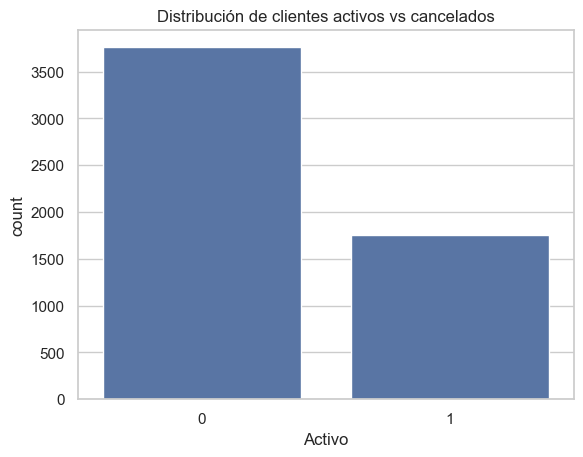

In [255]:
sns.countplot(x='Activo', data=df_maste_raw)
plt.title('Distribución de clientes activos vs cancelados')
plt.show()

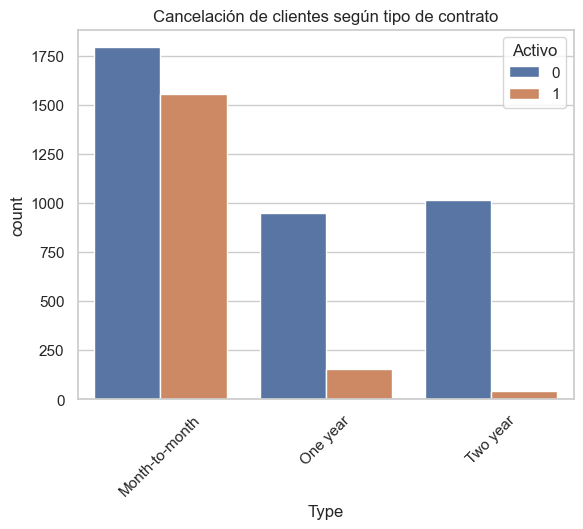

In [256]:
sns.countplot(x='Type', hue='Activo', data=df_maste_raw)
plt.title('Cancelación de clientes según tipo de contrato')
plt.xticks(rotation=45)
plt.show()

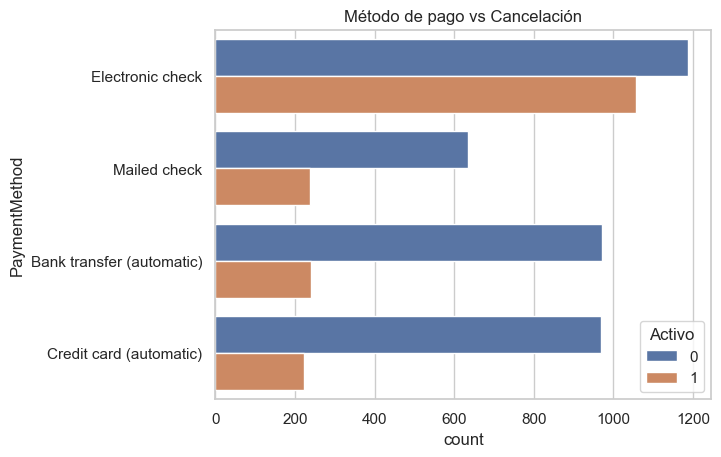

In [257]:
sns.countplot(y='PaymentMethod', hue='Activo', data=df_maste_raw)
plt.title('Método de pago vs Cancelación')
plt.show()

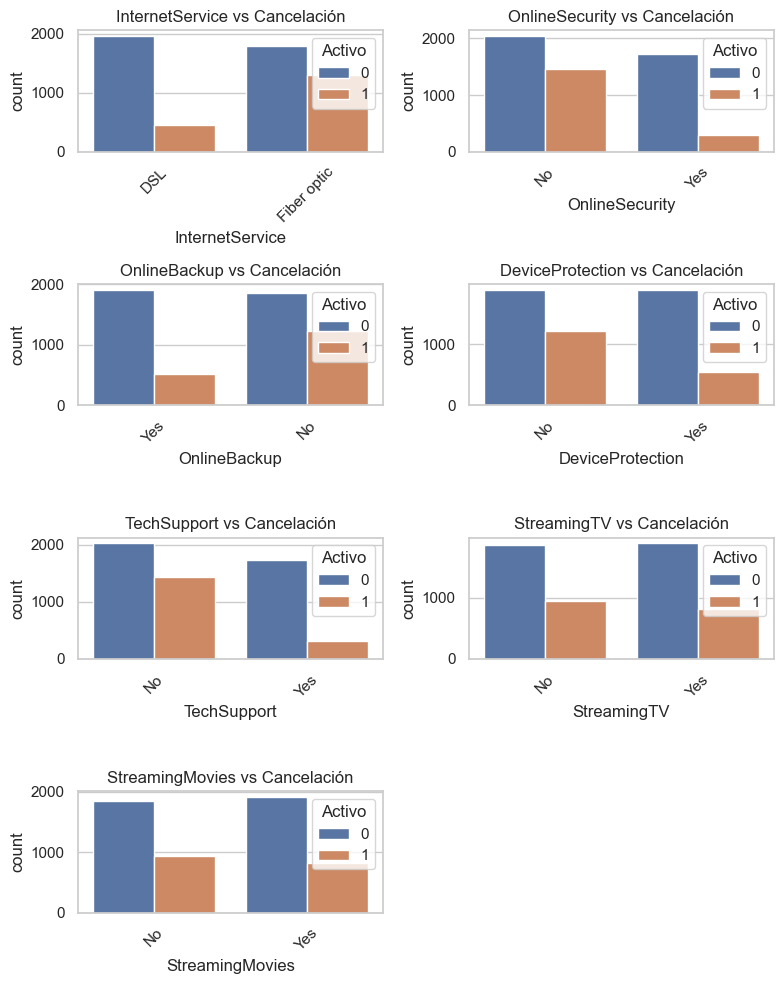

In [258]:
# Lista de columnas de servicios
internet_services = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Definir tamaño del gráfico
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Crear un gráfico por cada columna
for i, col in enumerate(internet_services):
    sns.countplot(x=col, hue='Activo', data=df_maste_raw, ax=axes[i])
    axes[i].set_title(f'{col} vs Cancelación')
    axes[i].tick_params(axis='x', rotation=45)


fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

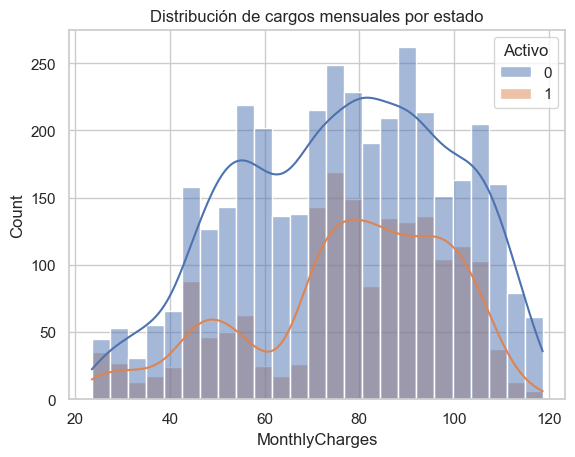

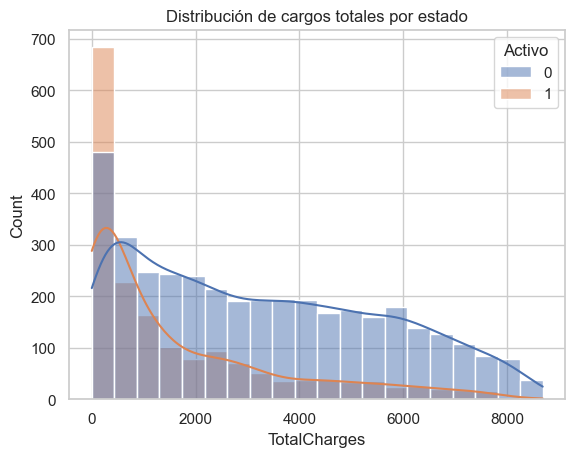

In [259]:
# Histograma de MonthlyCharges
sns.histplot(data=df_maste_raw, x='MonthlyCharges', hue='Activo', kde=True)
plt.title('Distribución de cargos mensuales por estado')
plt.show()

# Histograma de TotalCharges (convertir si es necesario)
df_maste_raw['TotalCharges'] = pd.to_numeric(df_maste_raw['TotalCharges'], errors='coerce')
sns.histplot(data=df_maste_raw, x='TotalCharges', hue='Activo', kde=True)
plt.title('Distribución de cargos totales por estado')
plt.show()

Distribución de cancelación:
Se observa que la mayoría de los clientes aún están activos, representando un 73.5%, mientras que el 26.5% ya ha cancelado su contrato. Esto indica que, en general, la retención es alta, aunque la fuga sigue siendo un tema relevante.

Tipo de contrato vs cancelación:
La mayor tasa de cancelación se encuentra entre los clientes con contratos mes a mes, lo que sugiere que la flexibilidad de este tipo de contrato podría estar asociada a una mayor probabilidad de abandono. En contraste, los contratos de 1 año o 2 años presentan una menor tasa de cancelación, probablemente debido a compromisos más largos y posibles penalizaciones por cancelación anticipada.

Método de pago vs cancelación:
El método "Electronic check" se asocia con la mayor cantidad de cancelaciones, lo que podría indicar un perfil de cliente menos comprometido o con menor confianza en servicios automatizados. Métodos más estructurados como transferencias automáticas o tarjetas de crédito parecen estar relacionados con una menor tasa de cancelación.

Servicios de Internet vs cancelación:
Se observa una mayor proporción de clientes que se han dado de baja cuando no tienen servicios adicionales como seguridad en línea, soporte técnico, respaldo o streaming. Esto podría indicar que los servicios complementarios ayudan a aumentar la retención. Sin embargo, en algunos casos la diferencia es menor, lo que sugiere que no todos los servicios influyen igual en la decisión de cancelar

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Bien, tienes un EDA bastante completo con sus respectivas conclusiones
</div>

# Paso 4. Modelado y predicción
 - Seleccionar y entrenar modelos de Machine Learning.
 - Evaluar el rendimiento con métricas como precisión, recall y AUC-ROC.

In [260]:
train_valid, test = train_test_split( datos_para_modelo, test_size=0.20, random_state=12345)

In [261]:
train, valid  = train_test_split(train_valid, test_size=0.25, random_state=12345)

In [262]:
exit_client_train = (train[train['Activo']== 1])
stay_client_train = (train[train['Activo']== 0])
print(exit_client_train.shape)
print(stay_client_train.shape)

In [263]:
train_features = train.drop(['Activo'], axis = 1)
train_target = train['Activo']
train_target.value_counts()

In [264]:
valid_features = valid.drop(['Activo'], axis = 1)
valid_target = valid['Activo']

In [265]:
test_features = test.drop(['Activo'], axis = 1)
test_target = test['Activo']

In [266]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


In [ ]:
features_upsampled, target_upsampled = upsample(
    train_features, train_target, 8
)

target_upsampled.value_counts()

In [289]:
best_score = 0
for n_arboles in range (40,49,1):
    modelo_bosque =  RandomForestClassifier(n_estimators=n_arboles , random_state=12345).fit(features_upsampled,target_upsampled)
    score = modelo_bosque.score(valid_features, valid_target)
    if score > best_score:
        best_score = score
        best_est = n_arboles  

In [290]:
print('Mejor numero de arboles:',best_est)
print('Mejor puntaje:',best_score)

In [291]:
score_validacion = modelo_bosque.score(test_features, test_target)
print("puntaje de modelo bosque", score_validacion)

predicted_valid_bosque_test = modelo_bosque.predict(test_features)
print("puntaje de modelo bosque f1:",f1_score(test_target,predicted_valid_bosque_test,))


In [292]:

auc_roc = roc_auc_score(test_target,predicted_valid_bosque_test)
print('modelo de bosque auc-roc',auc_roc)

### Modelo LightGBM

In [295]:
model_lgb = lgb.LGBMRegressor(num_interaction = 1000, verbose = 1, metric ='rmse')
model_lgb.fit(features_upsampled,target_upsampled, eval_set = (valid_features,valid_target))

In [299]:

predicted_valid_lgb_test = model_lgb.predict(test_features)

In [298]:
auc_roc_LGBM = roc_auc_score(test_target, predicted_valid_lgb_test)
print('modelo de bosque auc-roc',auc_roc_LGBM)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Lograste un entrenamiento adecuado, pero recuerda que en todos tus proyectos debes redactar la conclusión del mismo. Debes hacer referencia a lo visto en el EDA y los resultados del entrenamiento cómo tal. 
    
Procura no eliminar los comentarios de esta iteración, descarga el archivo con los comentarios y realiza los cambios sobre el mismo para no perder el seguimiento de tu progreso.
</div>

## Conclucion 
<div class="alert alert-block alert-info">
<b>Durante el análisis exploratorio de datos (EDA), se identificaron patrones importantes relacionados con la cancelación de clientes. La distribución de la variable objetivo mostró que el 68.2% de los usuarios permanecen activos, mientras que el 31.8% han cancelado su servicio. Esto evidenció un desbalance de clases que requería ser tratado antes de aplicar modelos de machine learning.

Se observó que la mayor tasa de cancelación se da en contratos mensuales, mientras que los contratos de 1 o 2 años retienen mejor a los usuarios. Asimismo, el método de pago Electronic Check está asociado con una mayor proporción de cancelaciones, y los clientes que no contratan servicios adicionales como seguridad, soporte técnico o streaming también presentan una mayor propensión a abandonar la compañía.

Para abordar este problema, se utilizó un modelo de clasificación con LightGBM, el cual fue entrenado tras aplicar técnicas de balanceo de clases mediante sobremuestreo (upsampling) para compensar la desproporción en la variable objetivo. Como resultado, se obtuvo una métrica AUC-ROC de 0.805, lo que indica un buen rendimiento del modelo al diferenciar entre clientes que cancelarán y los que no.

Este modelo puede ser integrado por el equipo de marketing de Interconnect para identificar de forma proactiva a clientes con alto riesgo de cancelación y ofrecerles promociones u opciones de fidelización personalizadas.</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario general (3ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo con el desarrollo del proyecto Rafael!
    
Realizaste una muy buena exploración de tus datos y planteaste comentarios acertados de los resultados, las métricas utilizadas para tus modelos son las adecuadas,
    
Me gustaría dejarte algunas recomendaciones para que resaltes tu perfil profesional en el mundo laboral:
    
- **Exponer los modelos:** Puedes agregar más valor a tu perfil profesional exponiendo los modelos para que puedan ser utilizados en algún demo, esto puedes hacerlo con streamlit y en render.com cómo lo hiciste en un sprint anterior. Pero si quieres ir más allá también podrías investigar y hacerlo utilizando el framework de FastAPI.
- **Herramientas cloud:** Para demostrar un perfil más completo, también podrías utilizar algún servicio cloud cómo AWS y tratar de subir tus modelos entrenados ahí. No tienes que hacerlo a manera de experto, pero siempre es un plus tener conocimiento de estas herramientas.
- **Continúa aprendiendo y practicando:** La práctica hace al maestro, mientras más practiques más errores podrás solucionar y estarás más listo para afrontar problemas reales en un entorno laboral.
    
Saludos y felicidades!
</div>

## Informe  
<div class="alert alert-block alert-info">
<b>¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?  
¿Qué dificultades encontraste y cómo lograste resolverlas?  
¿Cuáles fueron algunos de los pasos clave para resolver la tarea?  
¿Cuál es tu modelo final y qué nivel de calidad tiene?</b> <a class="tocSkip"></a>
</div>

###  ¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?

**Pasos realizados:**

- Se llevó a cabo un análisis exploratorio (EDA) detallado, visualizando la distribución de cancelaciones y evaluando el comportamiento de las variables relevantes.
- Se realizó el preprocesamiento de los datos: transformación de fechas, creación de la columna `Tenure`, limpieza de nulos y codificación de variables.
- Se aplicó balanceo de clases usando **upsampling** para evitar que el modelo favoreciera a la clase mayoritaria.
- Se entrenaron múltiples modelos, seleccionando **LightGBM** como el mejor por su rendimiento.

**Pasos omitidos:**

- No se aplicó ingeniería de características avanzada ni optimización de hiperparámetros exhaustiva, ya que la solución base arrojó buenos resultados y se priorizó entregar un modelo funcional.

---

###  ¿Qué dificultades encontraste y cómo lograste resolverlas?

- **Fechas mal formateadas y nulos en `TotalCharges`:** se convirtieron adecuadamente y los nulos fueron imputados con 0 solo cuando fue justificable.
- **Registros con nulos en servicios de Internet:** se eliminaron 1,526 registros sin este servicio para evitar distorsión.
- **Desbalance de clases en la variable objetivo:** se utilizó upsampling para equilibrar la representación de clientes activos e inactivos.

---

###  ¿Cuáles fueron algunos de los pasos clave para resolver la tarea?

- Crear la columna `Tenure` a partir de las fechas de contrato.
- Visualizar gráficamente la cancelación por tipo de contrato y servicios ofrecidos.
- Aplicar balanceo con upsampling.
- Usar el modelo **LightGBM**, que mostró alta capacidad de generalización.

---

### ¿Cuál es tu modelo final y qué nivel de calidad tiene?

El modelo final es **LightGBM**, que logró un **AUC-ROC de 0.805**.  
Esto indica una buena capacidad predictiva para detectar usuarios con alta probabilidad de cancelar su contrato, lo que permitirá a la empresa tomar decisiones proactivas y aplicar estrategias de retención más eficaces.